In [1]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
from itertools import product
import numpy as np


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

In [2]:
datasets = dict(blood = ['donor', 'celltype.l2'], heart = ['cell_source', 'cell_type'], 
            lung = ['tech_sample', 'cell_type'], colon = ['Source', 'CellType'], 
            liver = ['orig.ident', 'cell.labels'])

In [3]:
folder = 'integration_metrics/'
filenames = os.listdir(folder)

In [4]:
metrics = {}
for file in filenames:
    for ds, f in datasets.items():
        if f[0] in file and f[1] in file:
            if 'scvi' in file:
                index = ['scVI']
            elif 'expimap_1' in file:
                index = ['expiMap']
            else:
                continue
            df = pd.DataFrame(pd.read_pickle(folder+file), index=index)
            del df['adata_name']
            
            if ds in metrics:
                metrics[ds] = metrics[ds].append(df)
            else:
                metrics[ds] = df

In [5]:
folder = 'integration_metrics_ldvae_cdec_def/'
filenames = os.listdir(folder)

In [6]:
for file in filenames:
    for ds, f in datasets.items():
        if f[0] in file and f[1] in file:
            if 'ldvae' in file:
                index = ['LDVAE']
            else:
                index = [f'cdec_lr_{lr}_pca_{pca}' for (lr, pca) in product([0.2, 0.15, 0.1, 0.05], [True, False]) if f'X_cdec_lr_{lr}_pca_{pca}' in file]
            df = pd.DataFrame(pd.read_pickle(folder+file), index=index)
            del df['adata_name']
            metrics[ds] = metrics[ds].append(df)

In [7]:
for ds in metrics:
    metrics[ds]['overall'] = metrics[ds].mean(axis=1)

In [8]:
metrics_overall = None
for ds in datasets:
    df = pd.DataFrame(metrics[ds]['overall'].to_dict(), index=[ds])
    metrics_overall = df if metrics_overall is None else metrics_overall.append(df)

In [9]:
metrics_overall

,expiMap,scVI,cdec_lr_0.05_pca_False,cdec_lr_0.05_pca_True,cdec_lr_0.15_pca_False,cdec_lr_0.15_pca_True,cdec_lr_0.1_pca_False,cdec_lr_0.1_pca_True,cdec_lr_0.2_pca_False,cdec_lr_0.2_pca_True,LDVAE
blood,0.729789,0.735738,0.695314,0.767560,0.604341,0.585881,0.611721,0.698836,0.527808,0.612565,0.686905
heart,0.784886,0.779215,0.708586,0.782665,0.687133,0.777742,0.728113,0.776862,0.671955,0.793098,0.800173
lung,0.731294,0.686102,0.699706,0.716114,0.664344,0.705489,0.688484,0.703135,0.592362,0.673433,0.687804
colon,0.611800,0.602337,0.626328,0.622010,0.538794,0.593614,0.574195,0.614717,0.541414,0.535790,0.581386
liver,0.690736,0.641872,0.699570,0.714400,0.671654,0.697896,0.693211,0.709034,0.555313,0.704660,0.655133


In [10]:
col_cdec = 3
metrics_sel = metrics_overall.iloc[:, [0, 1, col_cdec, metrics_overall.shape[1]-1]]

In [11]:
col_rnm = metrics_overall.columns[col_cdec]

In [12]:
col_rnm

'cdec_lr_0.05_pca_True'

In [13]:
metrics_sel

,expiMap,scVI,cdec_lr_0.05_pca_True,LDVAE
blood,0.729789,0.735738,0.767560,0.686905
heart,0.784886,0.779215,0.782665,0.800173
lung,0.731294,0.686102,0.716114,0.687804
colon,0.611800,0.602337,0.622010,0.581386
liver,0.690736,0.641872,0.714400,0.655133


In [14]:
metrics_sel.columns.name = 'methods'

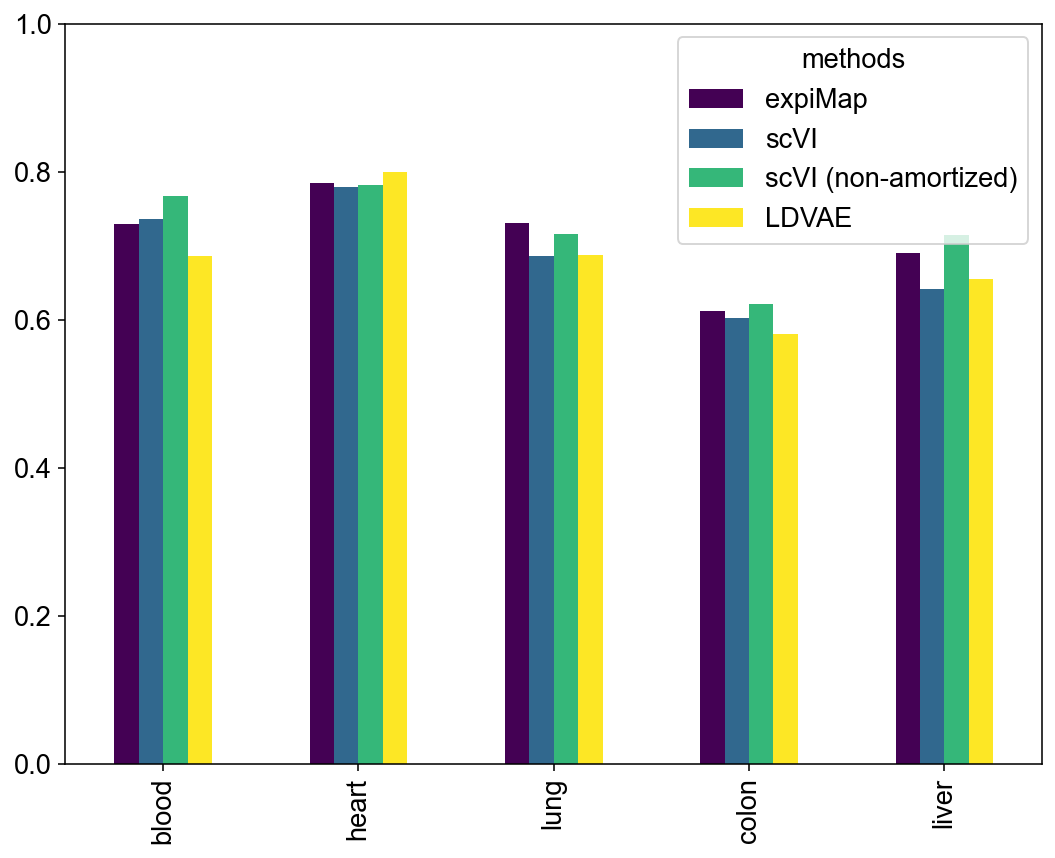

In [23]:
axs = metrics_sel.rename(columns={col_rnm:'scVI (non-amortized)'}).plot.bar(figsize=(9,7), colormap='viridis', ylim=(0,1))

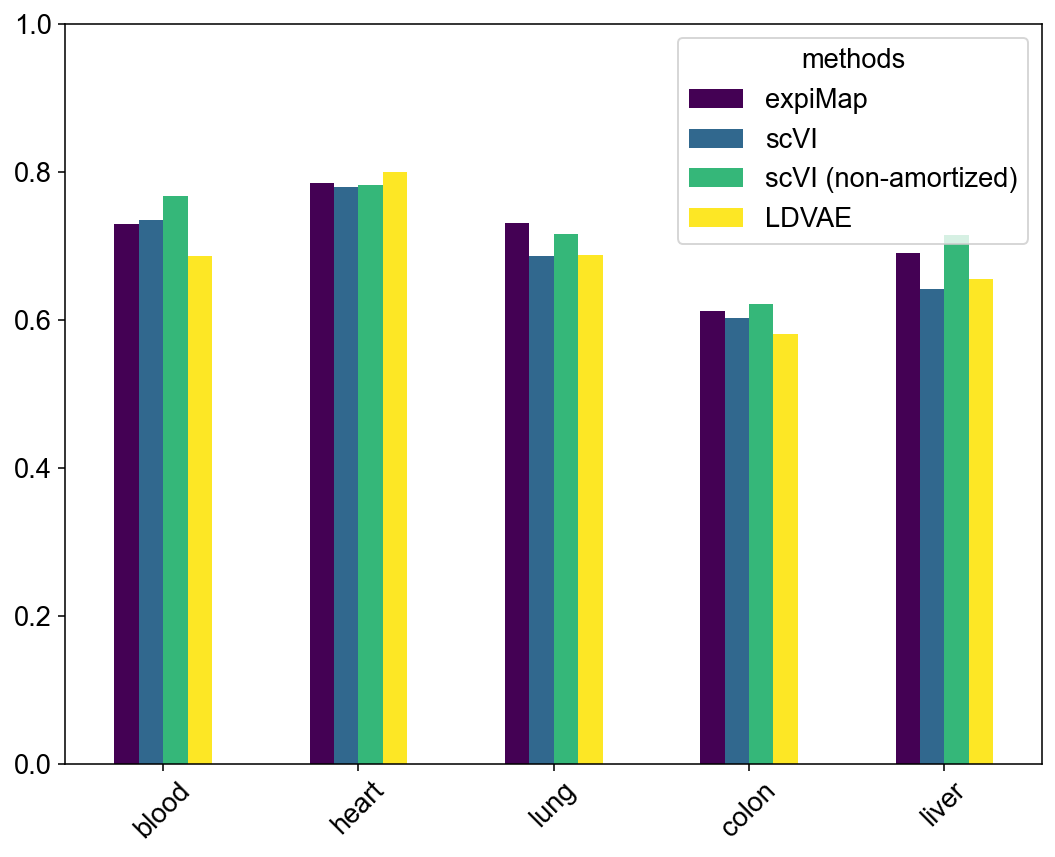

In [24]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure

In [17]:
cm = matplotlib.cm.get_cmap('viridis')

In [18]:
colors = []
for i in np.linspace(0, 1, 4):
    colors.append(cm(i))
colors[-2] = cm(0.7)
colors[-1] = cm(0.92)

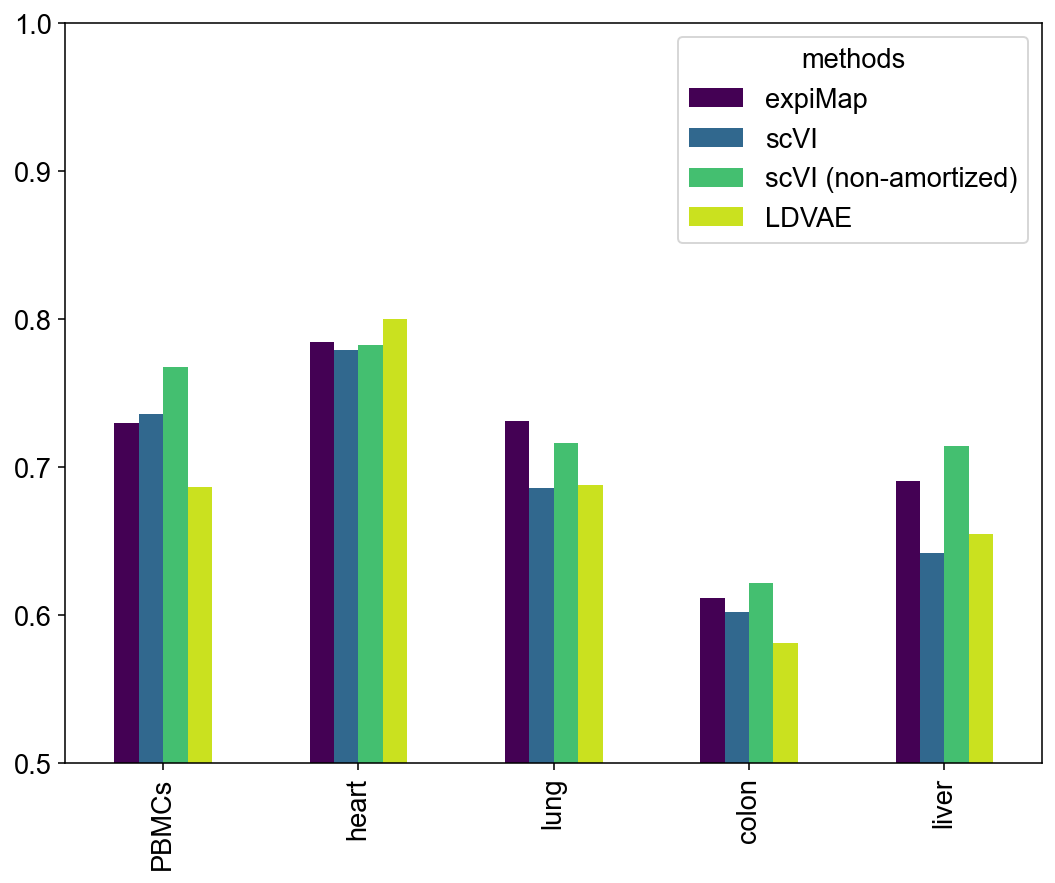

In [25]:
axs = metrics_sel.rename(columns={col_rnm:'scVI (non-amortized)'}, index={'blood':'PBMCs'}).plot.bar(figsize=(9,7), color=colors,ylim=(0.5,1))

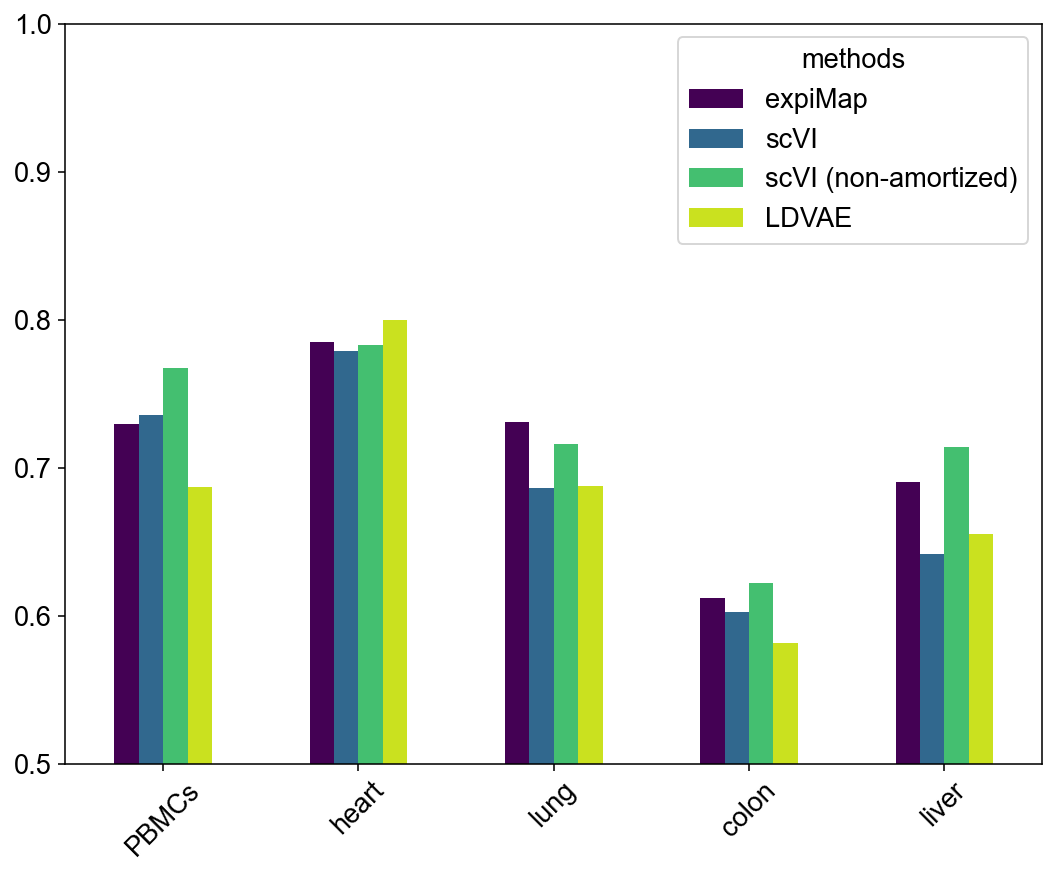

In [26]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure

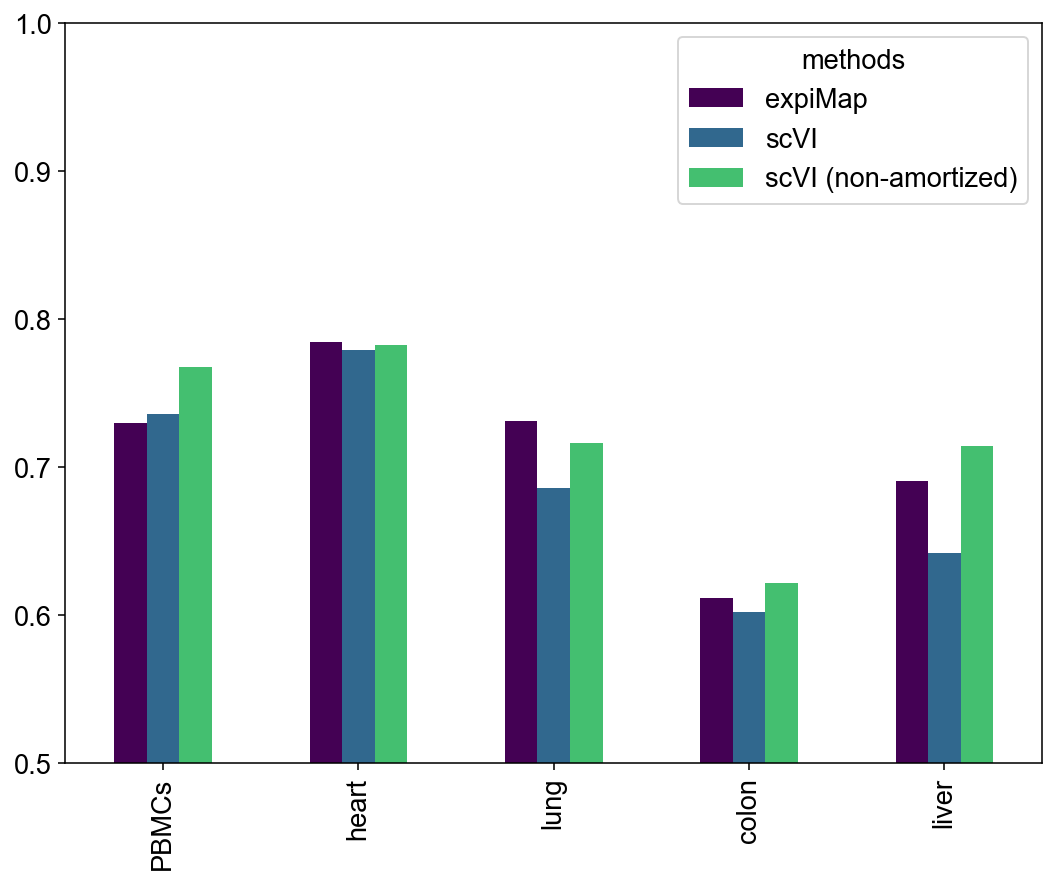

In [29]:
axs = metrics_sel.iloc[:, :-1].rename(columns={col_rnm:'scVI (non-amortized)'}, index={'blood':'PBMCs'}).plot.bar(figsize=(9,7), color=colors[:-1],ylim=(0.5,1))

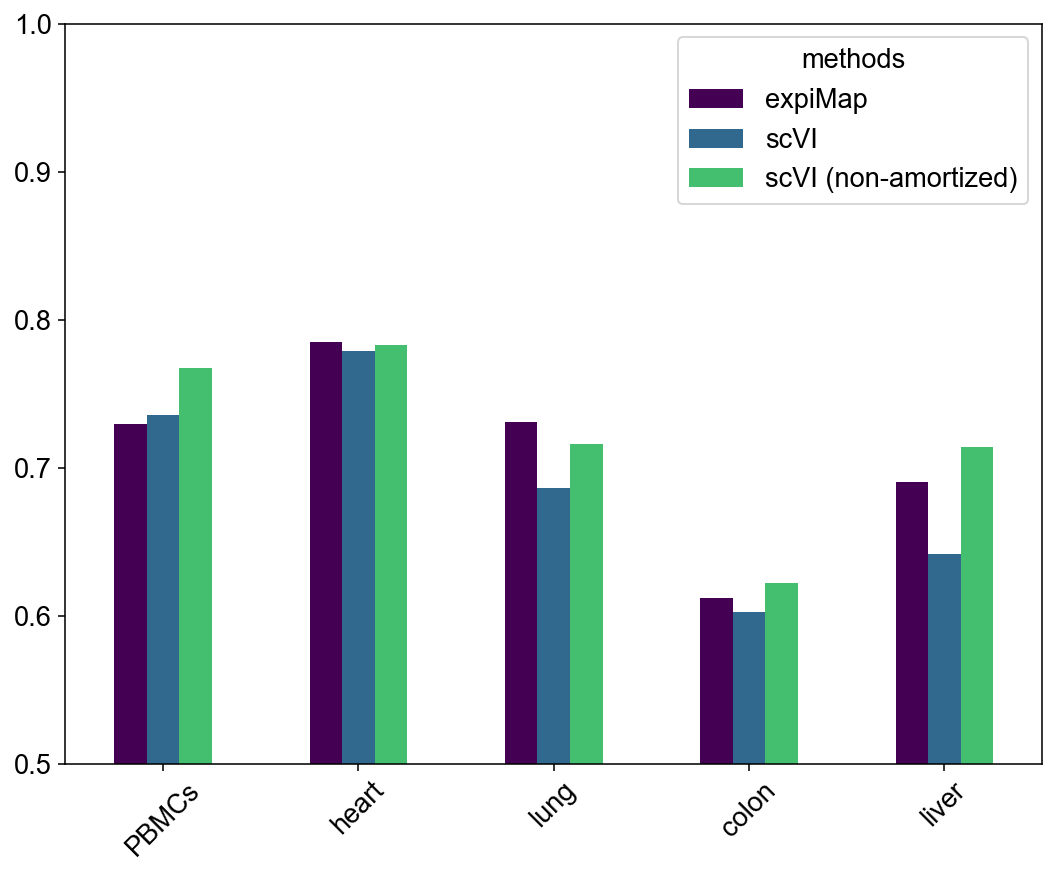

In [30]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure

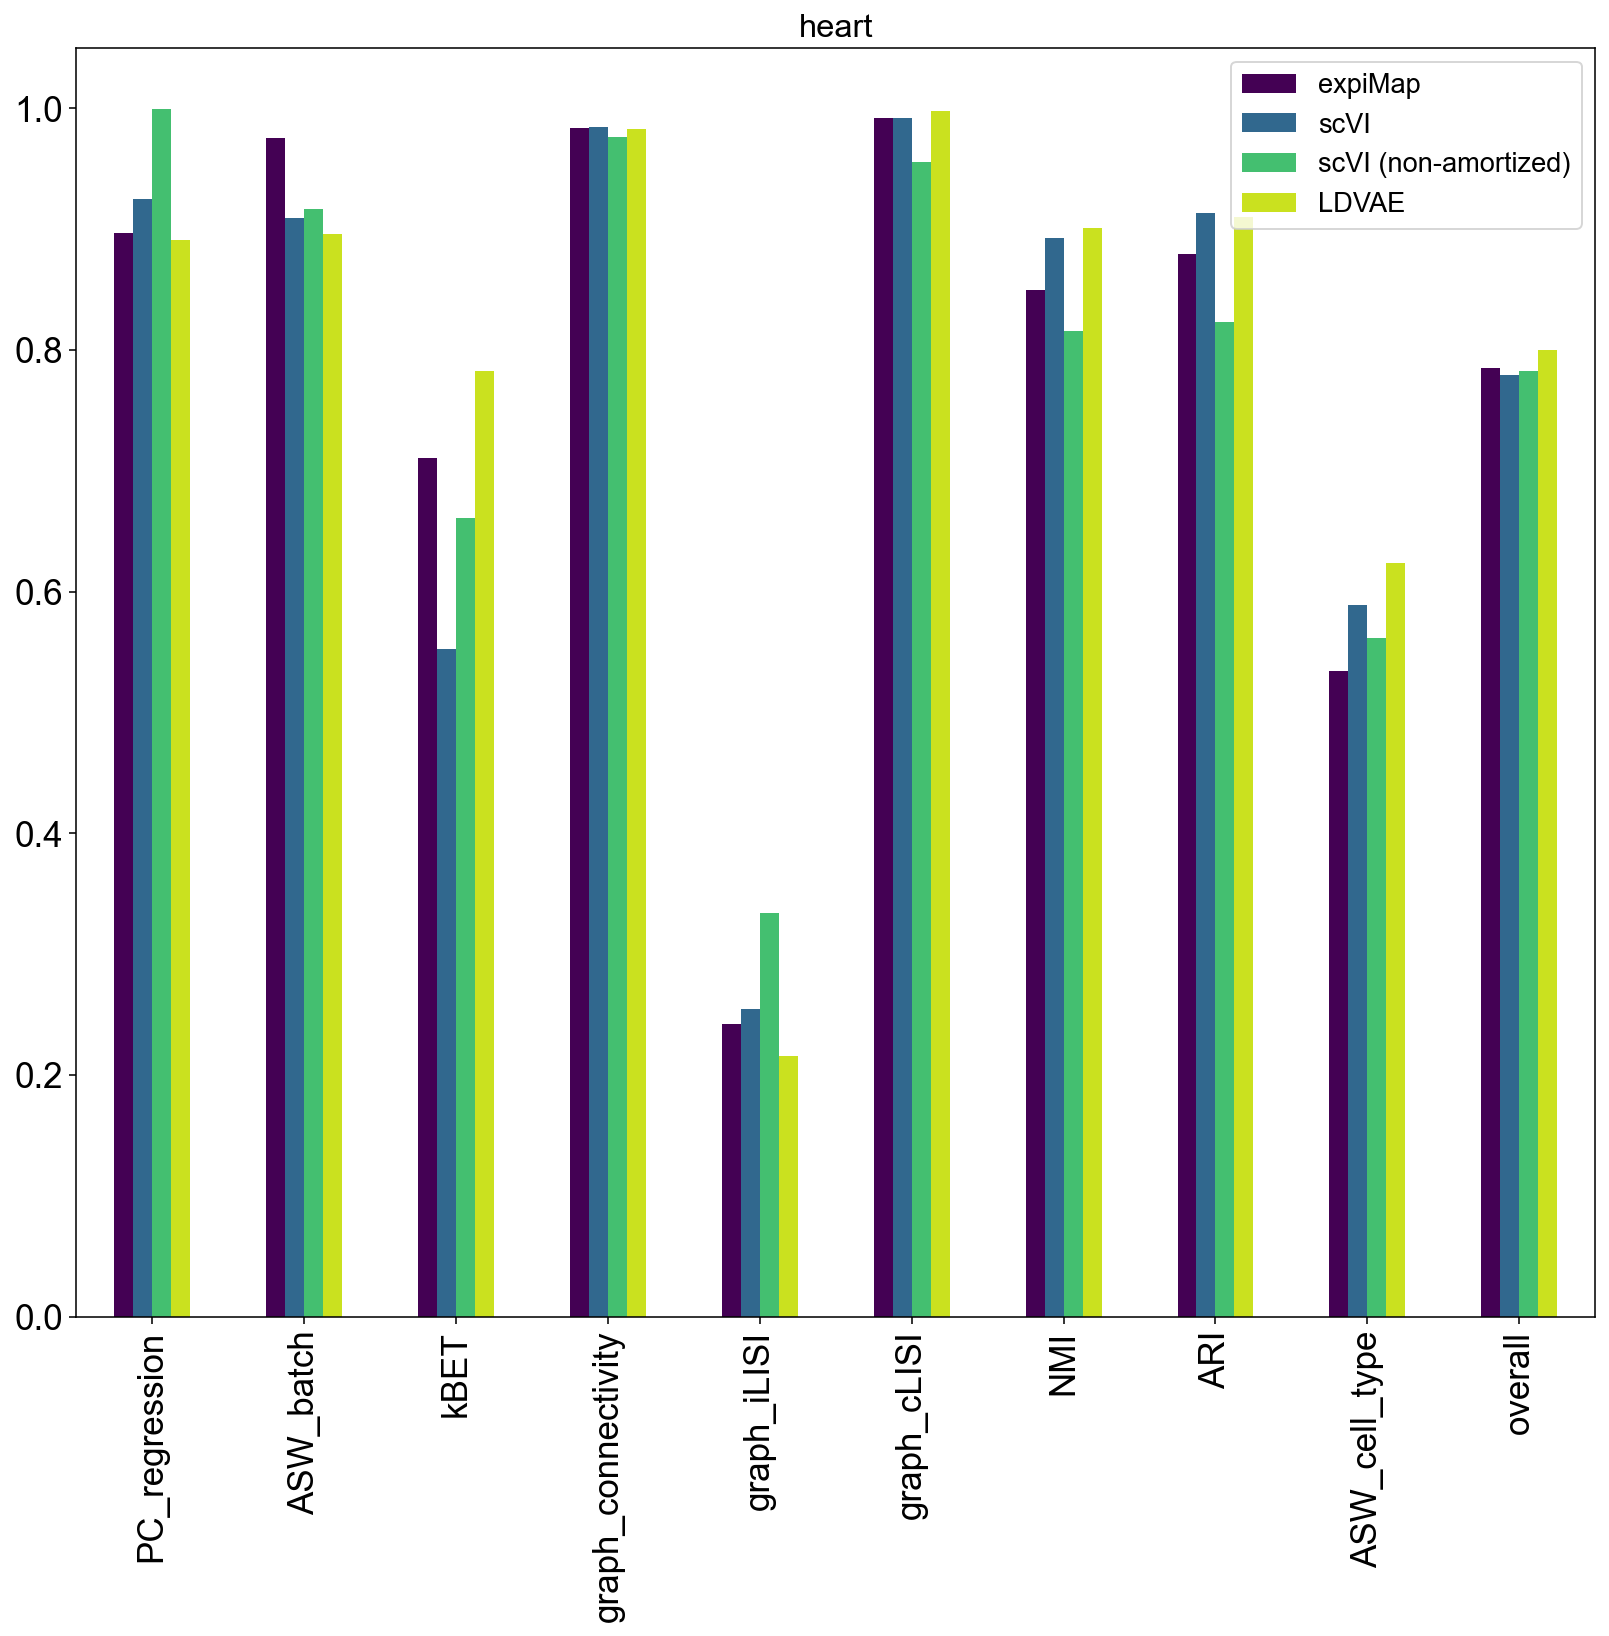

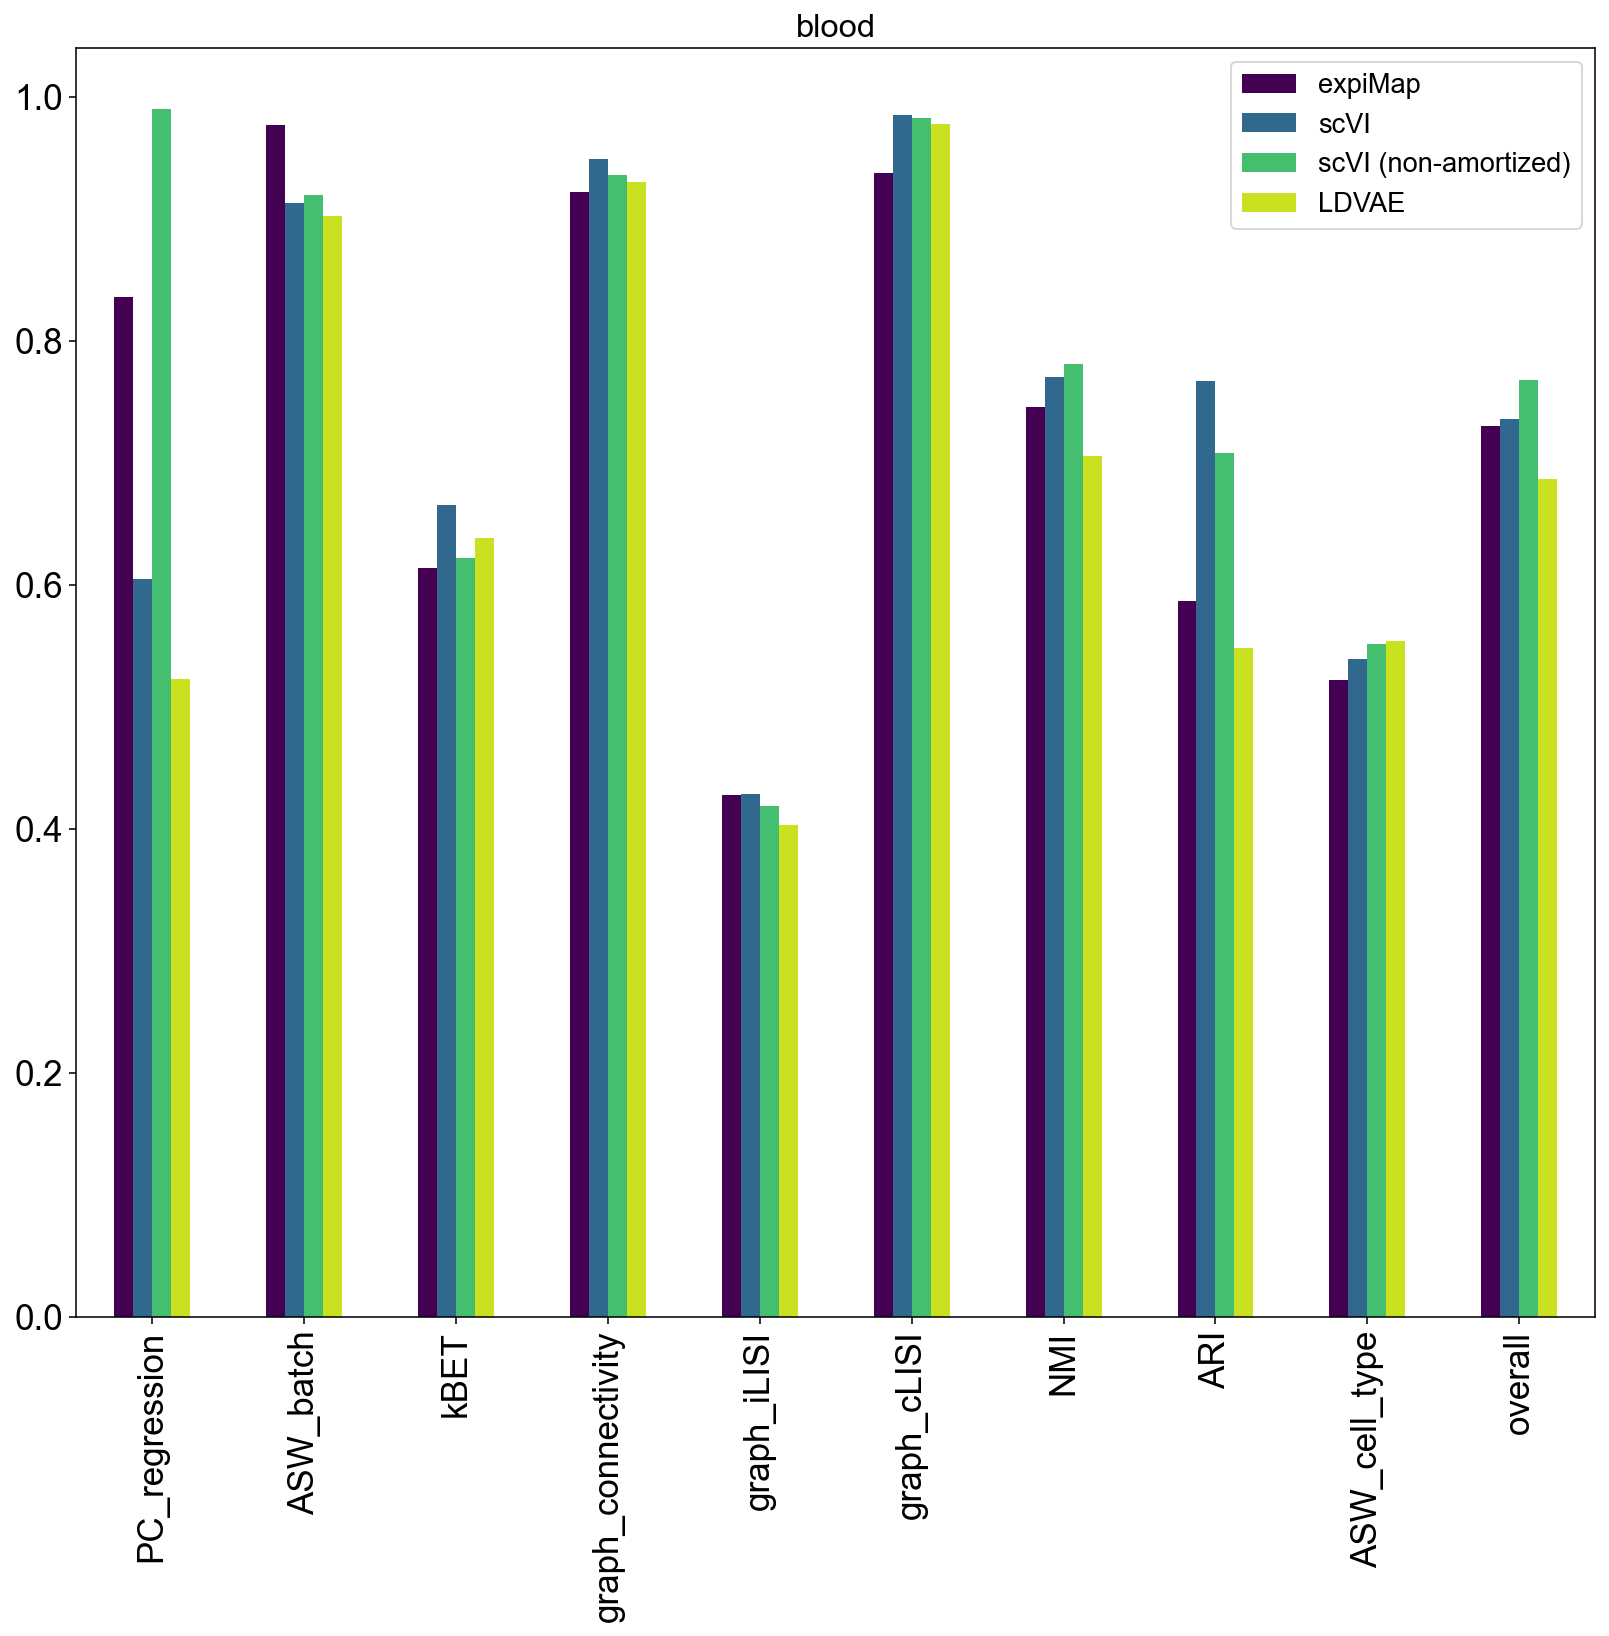

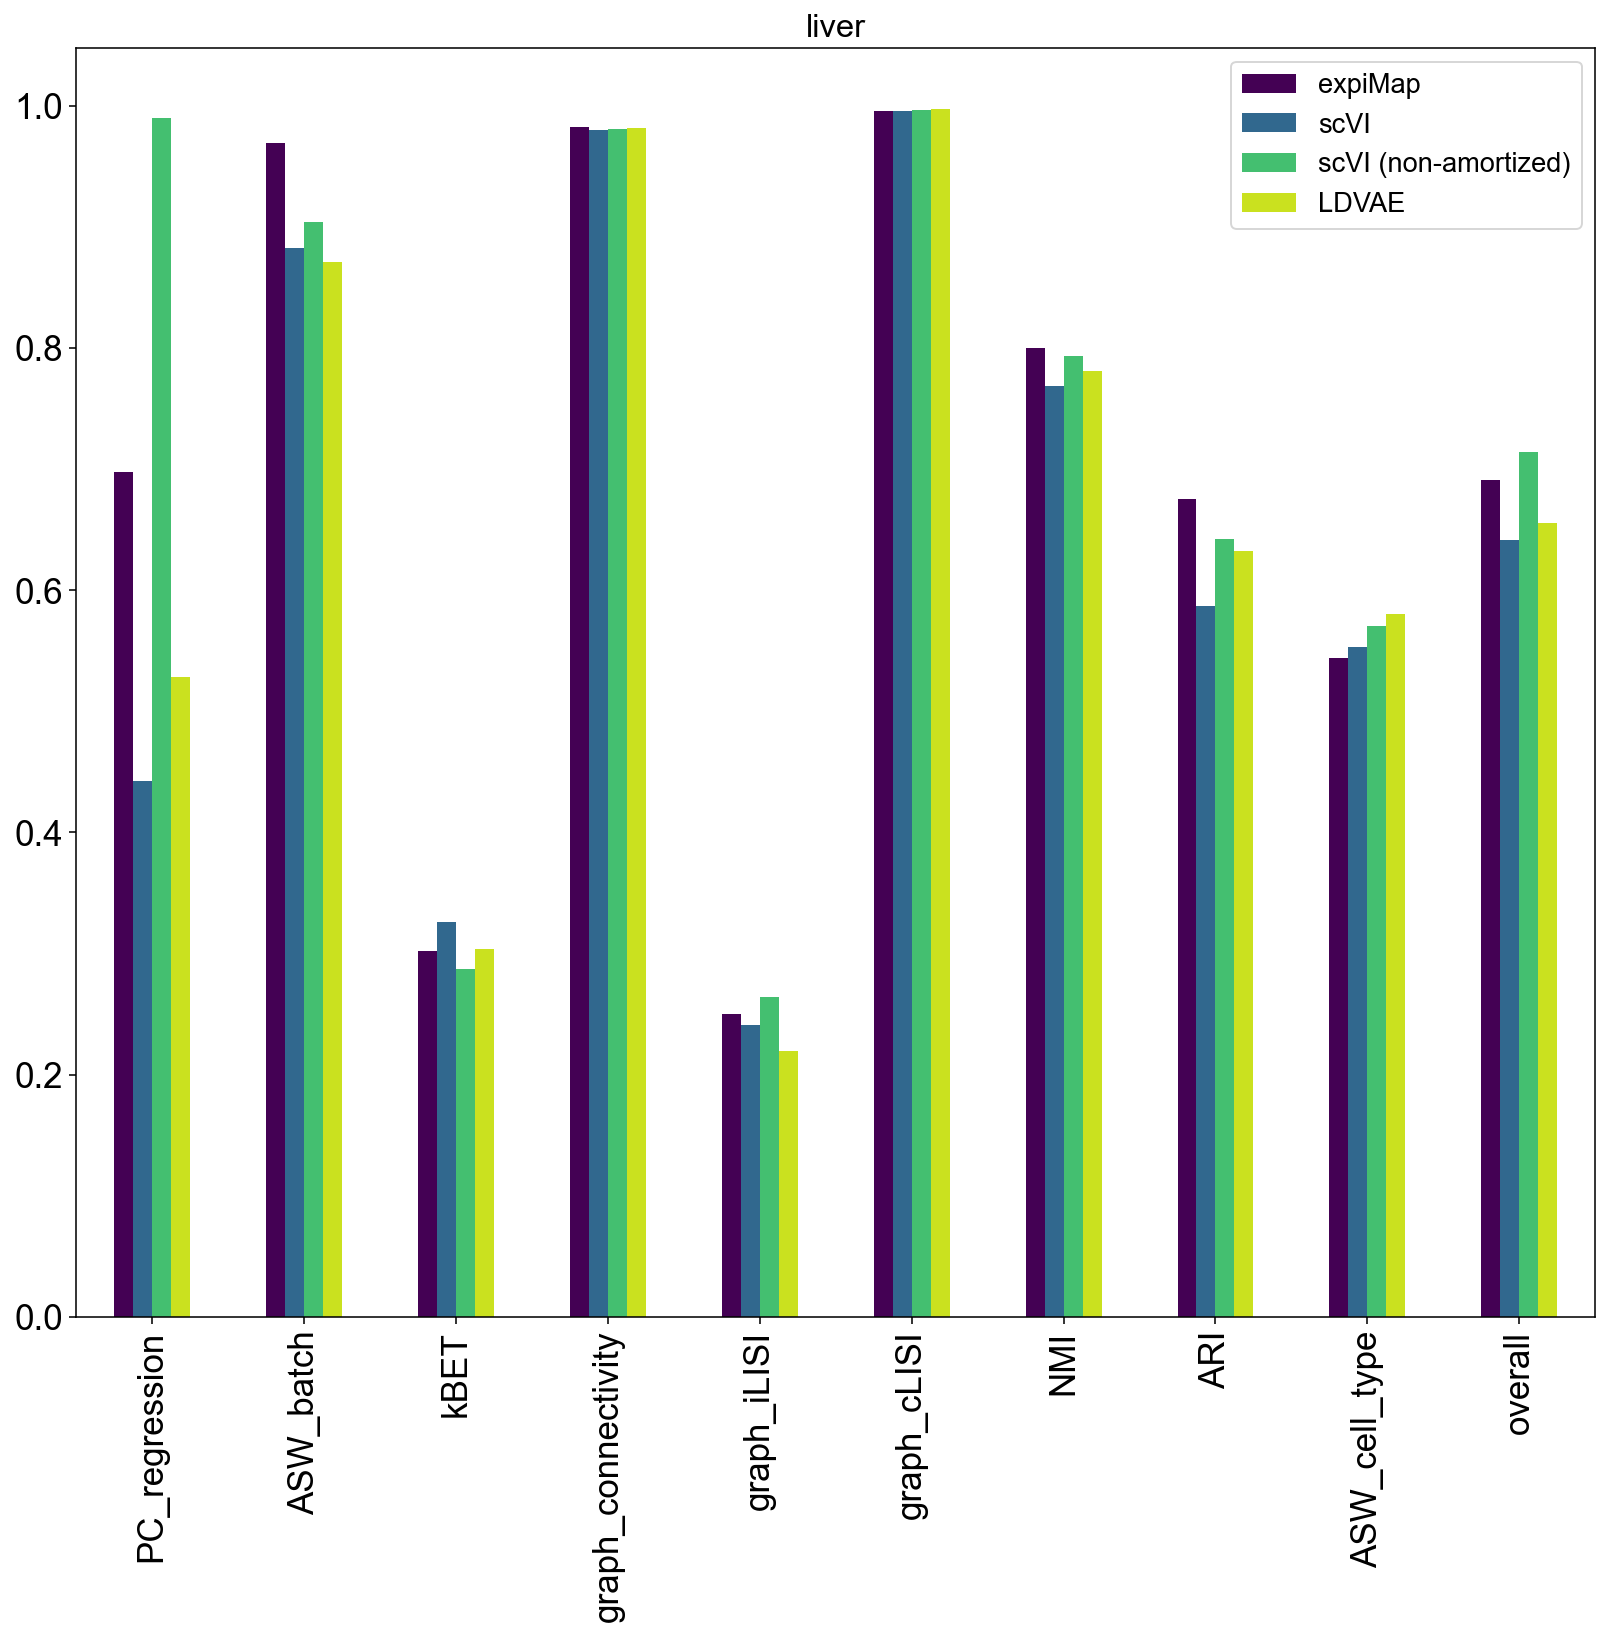

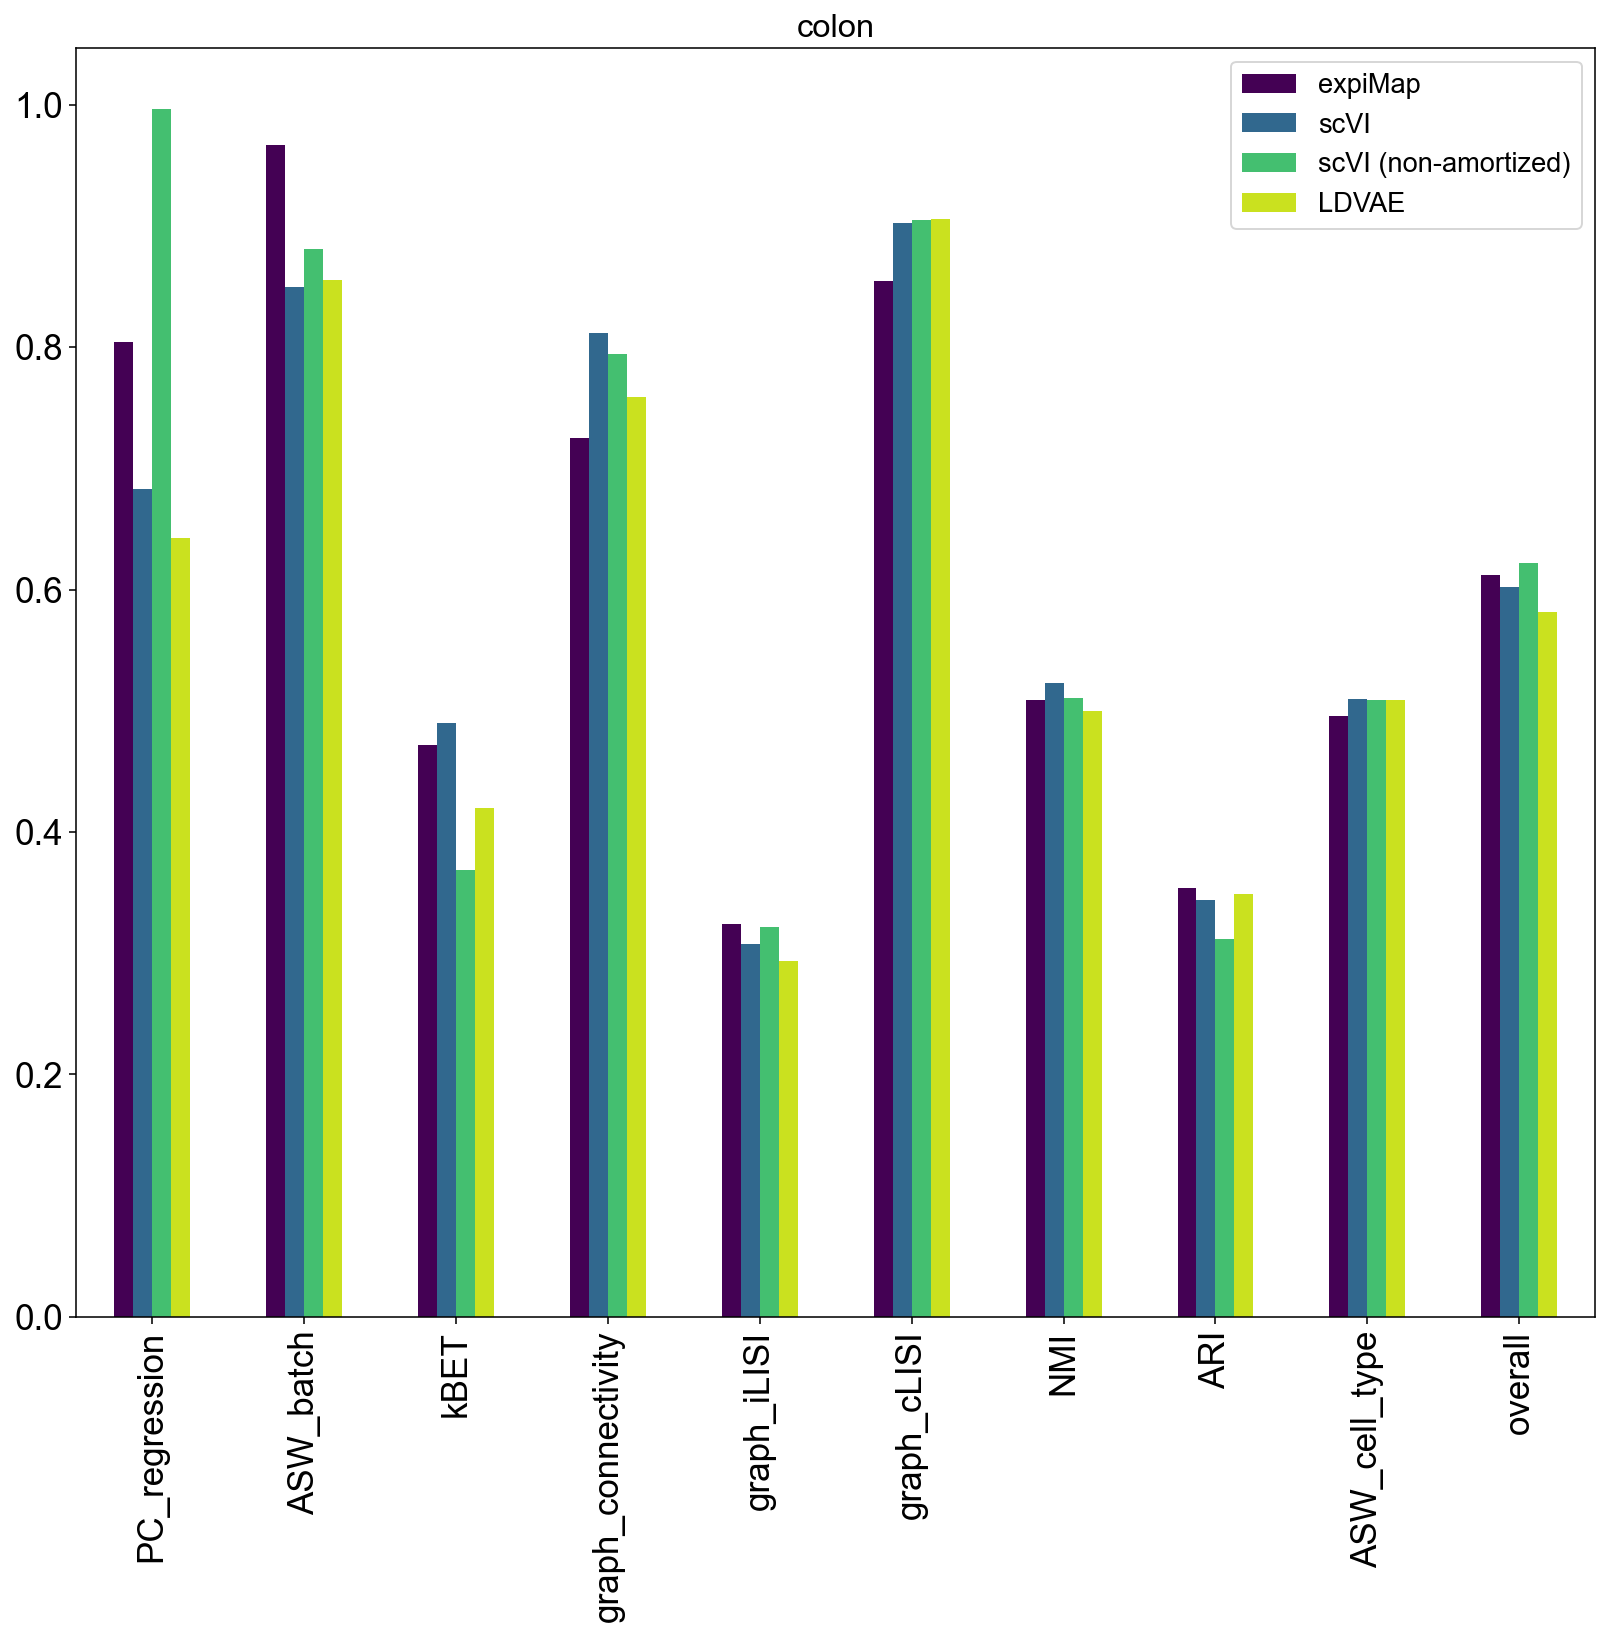

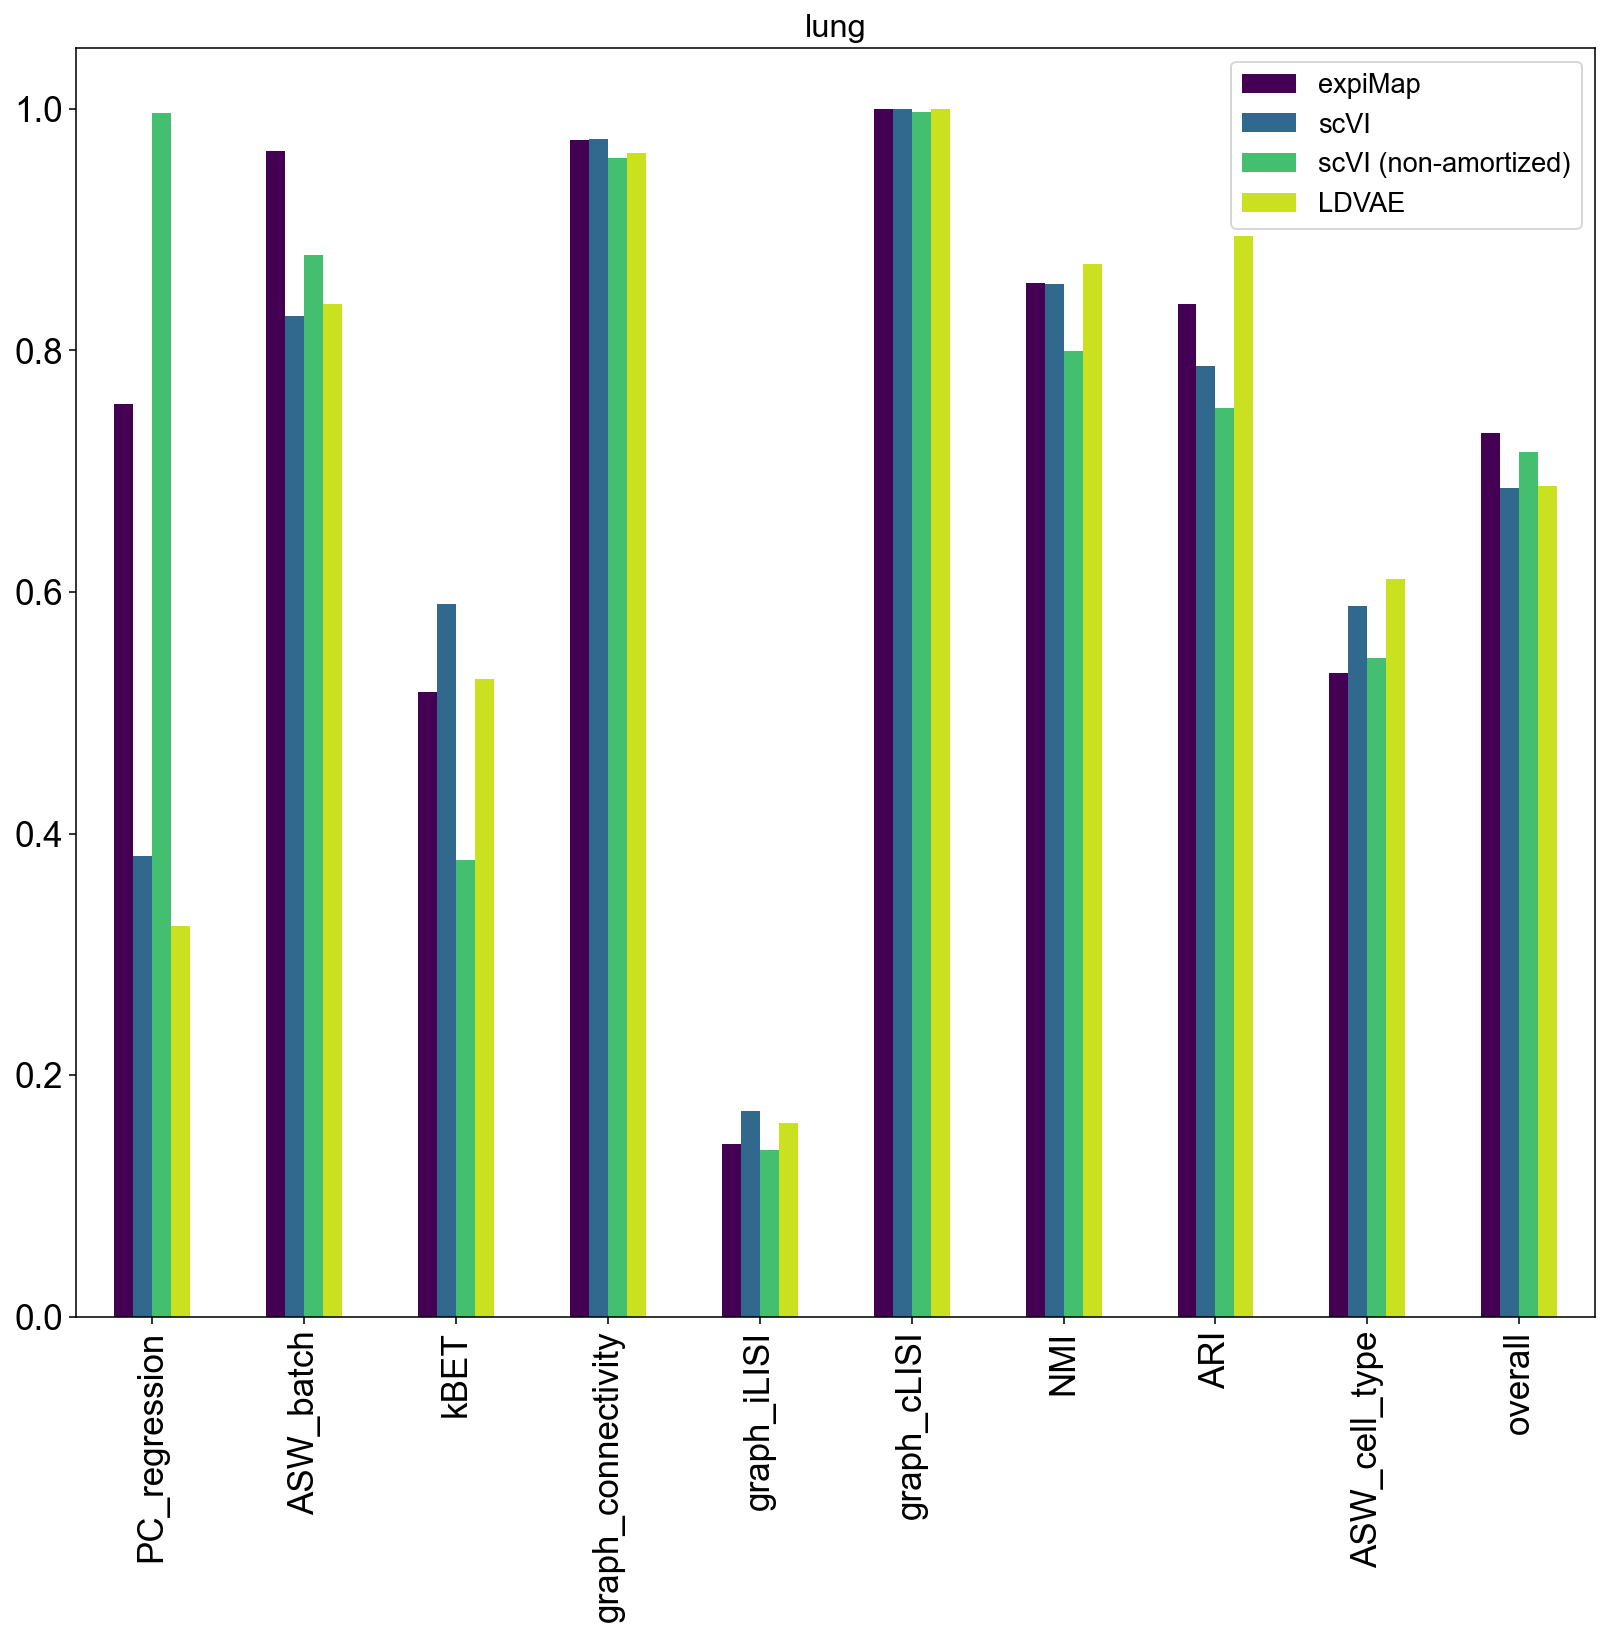

In [76]:
for ds in metrics:
    df = metrics[ds].loc[['expiMap', 'scVI', col_rnm, 'LDVAE']]
    df.T.rename(columns={col_rnm:'scVI (non-amortized)'}).plot.bar(figsize=(14,12), 
                                                                                          color=colors, title=ds, fontsize=18)